<a href="https://colab.research.google.com/github/shubham-hub/Rossmann-Sales-Prediction/blob/main/Capstone_Project_2_Shubham_Chavhan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

## **Import the required libraries**

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date
import warnings
warnings.filterwarnings("ignore")

## **Mount Google Drive**


In [2]:
#mounting google drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**Getting data from CSV file using Pandas**

In [79]:
#Importing the 2 datasets
df_Sales = pd.read_csv('/content/drive/MyDrive/Retail Sales Dataset - Regression /Rossmann Stores Data.csv')
df_Store = pd.read_csv('/content/drive/MyDrive/Retail Sales Dataset - Regression /store.csv')

###Let's see how our data looks like, and what all features we are having.

In [80]:
df_Sales.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [81]:
df_Store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### We have two sets of data. One contains data of sales and customer while the another dataset contains store description.We stored them in variables **'df_Sales'** and **'df_Store'** respectively.

## **1. For Sales dataframe.**

###let's explore the dataset.

In [82]:
df_Sales.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [83]:
df_Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


###Various stores associated with Rossmann are included in this dataset.
###There are details about sales for each day, the number of customers on that day, holidays, promos for that day, as well as what day of the week it is.

In [84]:
df_Sales.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


###**Check for null and duplicate values**

In [85]:
# Check for null values. 
null_sales_values = df_Sales.isnull().sum()
null_sales_values.sort_values(ascending=False)

SchoolHoliday    0
StateHoliday     0
Promo            0
Open             0
Customers        0
Sales            0
Date             0
DayOfWeek        0
Store            0
dtype: int64

In [86]:
# Check for duplicate rows.
df_Sales[df_Sales.duplicated()].count()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64


###Null and duplicate values, can have huge impact on our model. So it's important to handle them before hand.
###The dataset does not contain any nulls and duplicate values.
###No duplicate data, which means we have just one observation for a particular store on any choosen date

###**For Date Column**

### Check minimum, maximum date in given dataset

In [87]:
print('Minimum date in given dataset is = ',df_Sales['Date'].min())
print('Maximum date in given dataset is = ',df_Sales['Date'].max())

Minimum date in given dataset is =  2013-01-01
Maximum date in given dataset is =  2015-07-31


###It is almost 3 years data.

In [88]:
df_Sales['Date'] = pd.to_datetime(df_Sales.Date)

# extract year, month, day and week of year from "Date"

df_Sales['Year'] =pd.DatetimeIndex(df_Sales.Date).year
df_Sales['Month'] =pd.DatetimeIndex(df_Sales.Date).month
df_Sales['Day'] =pd.DatetimeIndex(df_Sales.Date).day
df_Sales['WeekOfYear'] = pd.DatetimeIndex(df_Sales.Date).weekofyear

### **Check various condition for Sales.**

In [89]:

x_1 = len(df_Sales[df_Sales['Sales'] < 0])
print(f'Count of sales that are less than zero == {x_1}')

print('--'*30)

x_2 = len(df_Sales[df_Sales['Sales'] == 0])
print(f'Count of sales with a value of zero == {x_2}')

print('--'*30)

x_3 = len(df_Sales[df_Sales['Open'] == 0])
print(f'Count of sales when store is closed == {x_3}')

print('--'*30)

x_4 = len(df_Sales[(df_Sales['Sales'] == 0)&(df_Sales['Open'] == 0)])
print(f'Count of sales with a value of zero when store is closed == {x_4}')

print('--'*30)

x_5 = len(df_Sales[(df_Sales['Sales'] == 0)&(df_Sales['Open'] == 1)])
print(f'Count of sales with a value of zero when store is open == {x_5}')

print('--'*30)

x_6 = len(df_Sales[(df_Sales['Sales'] > 0)&(df_Sales['Open'] == 0)])
print(f'Count of sales that greater than zero when the store is closed == {x_6}')

Count of sales that are less than zero == 0
------------------------------------------------------------
Count of sales with a value of zero == 172871
------------------------------------------------------------
Count of sales when store is closed == 172817
------------------------------------------------------------
Count of sales with a value of zero when store is closed == 172817
------------------------------------------------------------
Count of sales with a value of zero when store is open == 54
------------------------------------------------------------
Count of sales that greater than zero when the store is closed == 0


###**Check various condition for Customer.**

In [90]:
y_1 = len(df_Sales[df_Sales['Customers'] < 0])
print(f'Count of Sales with less than zero customers== {x_1}')

print('--'*30)

y_2 = len(df_Sales[df_Sales['Customers'] == 0])
print(f'Count of Sales with zero customers == {y_2}')

print('--'*30)

y_3 = len(df_Sales[(df_Sales['Sales'] == 0)&(df_Sales['Customers'] == 0)])
print(f'Count of Sales with value zero for zero customers == {y_3}')

print('--'*30)

y_4 = len(df_Sales[(df_Sales['Sales'] != 0)&(df_Sales['Customers'] == 0)])
print(f'Count of Sales that do not equal zero when customers are zero == {y_4}')

print('--'*30)

y_5 = len(df_Sales[(df_Sales['Sales'] == 0)&(df_Sales['Customers'] > 0)])
print(f'Count of Sales that equal zero when customers are more than zero == {y_5}')


Count of Sales with less than zero customers== 0
------------------------------------------------------------
Count of Sales with zero customers == 172869
------------------------------------------------------------
Count of Sales with value zero for zero customers == 172869
------------------------------------------------------------
Count of Sales that do not equal zero when customers are zero == 0
------------------------------------------------------------
Count of Sales that equal zero when customers are more than zero == 2


##**Columns and Values Filtering**

### As we can see we have a fair amount of observation of days on which store is closed and as these observations doesn't provide us with any useful information regarding sales or customers we will drop them

### Also closed stores and closed stores with 0 sales are equal. So we can remove those observations as well as can get rid of the 'Open' column.


In [91]:
#Dropping all the observation of those days on which the stores are closed
closedStore_index = df_Sales[df_Sales["Open"] == 0].index
df_Sales.drop(closedStore_index , inplace = True )

# This column would be constant == 1, useless for our prediction
df_Sales.drop('Open',axis=1,inplace=True)

In [92]:
#Checking the shape of the data after dropping the rows above
df_Sales.shape

(844392, 12)

### Now we have 844392 rows down from 1017209 that we had earlier

##**For Store Dataframe**

In [93]:
df_Store = pd.read_csv('/content/drive/MyDrive/Retail Sales Dataset - Regression /store.csv')

In [94]:
df_Store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [95]:
df_Store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [96]:
df_Store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


###This dataset contains information on all stores. Like type of store, range of products, competitions and if store is participating in different promo and for how long.


In [97]:
print(df_Sales['Store'].nunique())
print(df_Store['Store'].nunique())

print(set(pd.DataFrame(df_Sales['Store'].value_counts()).index.to_list()) - set(pd.DataFrame(df_Store['Store'].value_counts()).index.to_list()))

1115
1115
set()


###As we can notice above we have in total 1115 unique stores in our sales dataset which is same as in our store dataset
###Sales and Store dataset have same number of stores.

In [98]:
# Check for duplicate rows.
df_Store[df_Store.duplicated()].count()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

###The dataset does not contain any duplicate values.
###Which means we have just one observation for a particular store.

In [99]:
# Missing data counts and percentage
print('Missing Data Count')
print(df_Store.isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(df_Store.isnull().sum().sort_values(ascending = False)/len(df_Store)*100,2))

Missing Data Count
PromoInterval                544
Promo2SinceYear              544
Promo2SinceWeek              544
CompetitionOpenSinceYear     354
CompetitionOpenSinceMonth    354
CompetitionDistance            3
Promo2                         0
Assortment                     0
StoreType                      0
Store                          0
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
PromoInterval                48.79
Promo2SinceYear              48.79
Promo2SinceWeek              48.79
CompetitionOpenSinceYear     31.75
CompetitionOpenSinceMonth    31.75
CompetitionDistance           0.27
Promo2                        0.00
Assortment                    0.00
StoreType                     0.00
Store                         0.00
dtype: float64


In [100]:
df_Store[df_Store['Promo2']!=0].head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
10,11,a,c,960.0,11.0,2011.0,1,1.0,2012.0,"Jan,Apr,Jul,Oct"
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"


In [101]:
df_Store[df_Store['Promo2']==0].head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN


In [102]:
len(df_Store.loc[df_Store['Promo2SinceWeek']==0])

0

In [103]:
df_Store.loc[df_Store['Promo2SinceYear']==0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval


In [104]:
df_Store.loc[df_Store['PromoInterval']==0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval


### The features Promo2SinceWeek, Promo2SincYear and PromoInterval are NaN for stores that didn't participate in Promo2(i.e. Promo2=0). 
###The lack of Promo2 means that all these features are unimportant.
###Hence, we can **replace NaN** values in these **3 features with 0.** 
### Zero will represent that the particular store didn't participate in Promo2.

In [105]:
#for all 3 features Promo2SinceWeek, Promo2SincYear and PromoInterval

df_Store['Promo2SinceWeek'].fillna(0, inplace = True)
df_Store['Promo2SinceYear'].fillna(0, inplace = True)
df_Store['PromoInterval'].fillna(0, inplace = True)

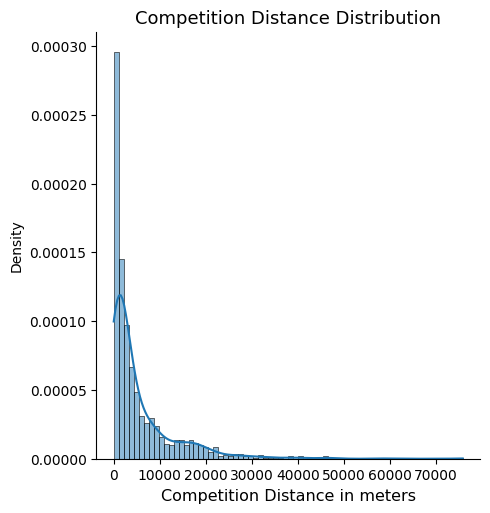

In [106]:
#Plotting distribution of Competition Distance.

p=sns.displot(data = df_Store, x='CompetitionDistance',stat = 'density',kde=True,bins=70)
p.fig.set_dpi(100)
plt.title('Competition Distance Distribution',size = 13)
plt.xlabel('Competition Distance in meters',fontsize=11.5)
plt.show()

In [107]:
Mean_Competition_Distance=df_Store['CompetitionDistance'].mean()
print(f'Most of stores have their competition distance in {Mean_Competition_Distance} Metre.')

Most of stores have their competition distance in 5404.901079136691 Metre.


###The figure above shows that most of the stores have their competition between 0km to 10km of their location.
###Hence, we can **replace NaN** values in these feature with mean value. 


In [108]:
df_Store['CompetitionDistance'].fillna(str(df_Store['CompetitionDistance'].mean()),inplace=True)

### Now for the null values of **CompetitionOpenSinceMonth and CompetitionOpenSinceYear** we can take two approach.
###1.   Replace null values with median of their respective columns
###2.   Replace null values with mean of their respective columns
###If we have extreme outliers we will use the first method and if not then second works fine

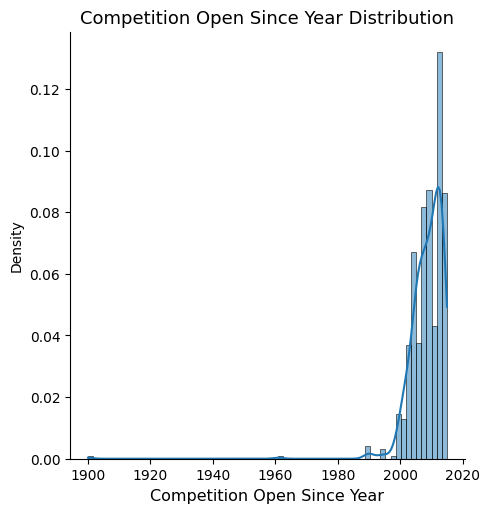

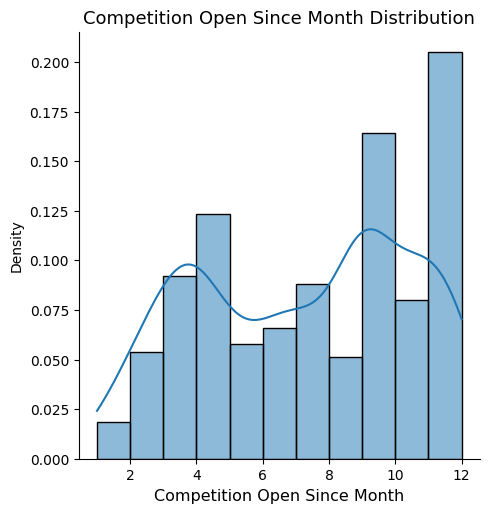

In [109]:
#Plotting distribution of Competition Open Since Year.

p=sns.displot(data = df_Store, x='CompetitionOpenSinceYear', stat = 'density',kde=True,bins=70)
p.fig.set_dpi(100)
plt.title('Competition Open Since Year Distribution',size = 13)
plt.xlabel('Competition Open Since Year',fontsize=11.5)
plt.show()

#Plotting distribution of Competition Open Since month
p=sns.displot(data = df_Store, x='CompetitionOpenSinceMonth', stat = 'density',kde=True)
p.fig.set_dpi(100)
plt.title('Competition Open Since Month Distribution',size = 13)
plt.xlabel('Competition Open Since Month',fontsize=11.5)
plt.show()

###The figure above shows that most of the stores have their competition year between 2000 to 2020 of their location. 
###We can notice above that we have some extreme outliers with values going as low as 1900 and hence we will replace values with median not mean
###Hence, we can **replace NaN** values in these feature with median value. 

In [110]:
#Replacing all the null values of CompetitionOpenSinceMonth and CompetitionOpenSinceYear columns with median values
df_Store['CompetitionOpenSinceYear'].fillna(str(df_Store['CompetitionOpenSinceYear'].median()),inplace=True)
df_Store['CompetitionOpenSinceMonth'].fillna(str(df_Store['CompetitionOpenSinceMonth'].median()),inplace=True)

In [111]:
df_Store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   object 
 4   CompetitionOpenSinceMonth  1115 non-null   object 
 5   CompetitionOpenSinceYear   1115 non-null   object 
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 87.2+ KB


In [112]:
#check for null values again
print(df_Store.isnull().sum().sort_values(ascending = False))

PromoInterval                0
Promo2SinceYear              0
Promo2SinceWeek              0
Promo2                       0
CompetitionOpenSinceYear     0
CompetitionOpenSinceMonth    0
CompetitionDistance          0
Assortment                   0
StoreType                    0
Store                        0
dtype: int64


###**Average Sales and Customer Data Set**

In [113]:
Avg_customer_df = pd.DataFrame(df_Sales.groupby('Store').agg({'Customers':['mean']}))
Avg_sales_df = pd.DataFrame(df_Sales.groupby('Store').agg({'Sales':['mean']}))

Avg_customer_df.columns = ['Avg_customers']
Avg_sales_df.columns = ['Avg_sales']

In [114]:
Avg_customer_df.head()

,Avg_customers
Store,
1,564.049936
2,583.998724
3,750.077022
4,1321.752551
5,537.340180


In [115]:
Avg_sales_df.head()

,Avg_sales
Store,
1,4759.096031
2,4953.900510
3,6942.568678
4,9638.401786
5,4676.274711


In [116]:
# Merging avg customer dataset with store df
df_Store = pd.merge(df_Store,Avg_customer_df, on = 'Store', how = 'left')

# Merging avg sales dataset with store df
df_Store = pd.merge(df_Store,Avg_sales_df, on = 'Store', how = 'left')

In [117]:
df_Store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Avg_customers,Avg_sales
0,1,c,a,1270,9,2008,0,0.0,0.0,0,564.049936,4759.096031
1,2,a,a,570,11,2007,1,13.0,2010.0,"Jan,Apr,Jul,Oct",583.998724,4953.900510
2,3,a,a,14130,12,2006,1,14.0,2011.0,"Jan,Apr,Jul,Oct",750.077022,6942.568678
3,4,c,c,620,9,2009,0,0.0,0.0,0,1321.752551,9638.401786
4,5,a,a,29910,4,2015,0,0.0,0.0,0,537.340180,4676.274711


###We have unique stores in both datasets, so we can merge both data sets and draw some meanigful insights from that.

In [118]:
# Merging both dataframe on store column
df_rossmann = pd.merge(df_Sales, df_Store, on = 'Store', how = 'left')

In [119]:
df_rossmann.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Avg_customers,Avg_sales
0,1,5,2015-07-31,5263,555,1,0,1,2015,7,31,31,c,a,1270,9,2008,0,0.0,0.0,0,564.049936,4759.096031
1,2,5,2015-07-31,6064,625,1,0,1,2015,7,31,31,a,a,570,11,2007,1,13.0,2010.0,"Jan,Apr,Jul,Oct",583.998724,4953.900510
2,3,5,2015-07-31,8314,821,1,0,1,2015,7,31,31,a,a,14130,12,2006,1,14.0,2011.0,"Jan,Apr,Jul,Oct",750.077022,6942.568678
3,4,5,2015-07-31,13995,1498,1,0,1,2015,7,31,31,c,c,620,9,2009,0,0.0,0.0,0,1321.752551,9638.401786
4,5,5,2015-07-31,4822,559,1,0,1,2015,7,31,31,a,a,29910,4,2015,0,0.0,0.0,0,537.340180,4676.274711


##**Change The Datatype**

###Check

In [120]:
df_rossmann.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Promo                                 int64
StateHoliday                         object
SchoolHoliday                         int64
Year                                  int64
Month                                 int64
Day                                   int64
WeekOfYear                            int64
StoreType                            object
Assortment                           object
CompetitionDistance                  object
CompetitionOpenSinceMonth            object
CompetitionOpenSinceYear             object
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                        object
Avg_customers                       float64
Avg_sales                       

###Change

In [123]:
# object to float for distance
df_rossmann['CompetitionDistance'] = df_rossmann['CompetitionDistance'].astype(float)

# float to int in columns related to dates
df_rossmann['CompetitionOpenSinceMonth'] = df_rossmann['CompetitionOpenSinceMonth'].astype(float)
df_rossmann['CompetitionOpenSinceMonth'] = df_rossmann['CompetitionOpenSinceMonth'].astype(int)
df_rossmann['CompetitionOpenSinceYear'] = df_rossmann['CompetitionOpenSinceYear'].astype(float)
df_rossmann['CompetitionOpenSinceYear'] = df_rossmann['CompetitionOpenSinceYear'].astype(int)
df_rossmann['Promo2SinceWeek'] = df_rossmann['Promo2SinceWeek'].astype(int)
df_rossmann['Promo2SinceYear'] = df_rossmann['Promo2SinceYear'].astype(int)

In [124]:
df_rossmann.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Promo                                 int64
StateHoliday                         object
SchoolHoliday                         int64
Year                                  int64
Month                                 int64
Day                                   int64
WeekOfYear                            int64
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth             int64
CompetitionOpenSinceYear              int64
Promo2                                int64
Promo2SinceWeek                       int64
Promo2SinceYear                       int64
PromoInterval                        object
Avg_customers                       float64
Avg_sales                       